In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../data/cleaned_merged_df.xlsx', index_col=0)
df

,Start Date,Regularity,Previous Night Sleep Quality Score,Good Sleep?,Steps,visibility_distance_mean,visibility_distance_min,visibility_distance_max,air_temperature_mean,air_temperature_min,...,humidity_mean,Moon Position,Daylight Hours,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,2019-12-24,73,86.204221,1,1155,13424.388889,3100,60000,9.001389,7.0,...,86.208333,0.910,7.832222,0,1,0,0,0,0,0
1,2019-12-25,82,86.000000,1,1267,18217.458333,300,65000,3.379167,-2.0,...,86.138889,0.944,7.837778,0,0,1,0,0,0,0
2,2019-12-26,86,88.000000,1,241,11234.250000,2500,50000,6.581944,-2.0,...,91.625000,0.978,7.844722,0,0,0,1,0,0,0
3,2019-12-27,90,90.000000,1,5310,9920.472222,4500,26000,6.386111,5.9,...,92.458333,0.012,7.853889,0,0,0,0,1,0,0
4,2019-12-28,87,92.000000,0,2580,9042.666667,2700,23000,7.656944,6.7,...,90.763889,0.046,7.864722,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2022-03-26,90,86.204221,1,11477,11156.527778,2700,35000,8.956944,-1.0,...,65.500000,0.780,12.583611,0,0,0,0,0,1,0
713,2022-04-01,91,86.204221,1,3700,19304.888889,9999,55000,3.204167,-3.0,...,69.680556,0.983,12.979167,0,0,0,0,1,0,0
714,2022-04-02,90,87.000000,1,5836,16419.507692,4600,55000,1.666154,-4.5,...,76.723077,0.017,13.045000,0,0,0,0,0,1,0
715,2022-04-03,87,89.000000,0,8514,14379.986111,800,50000,3.022222,-5.0,...,69.291667,0.050,13.110556,0,0,0,0,0,0,1


# Graphs

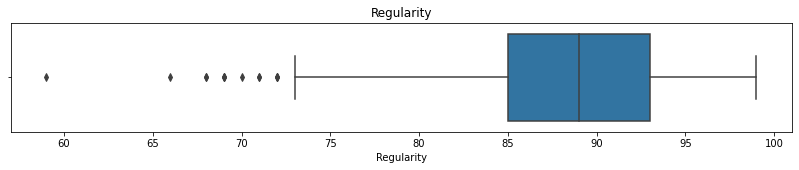

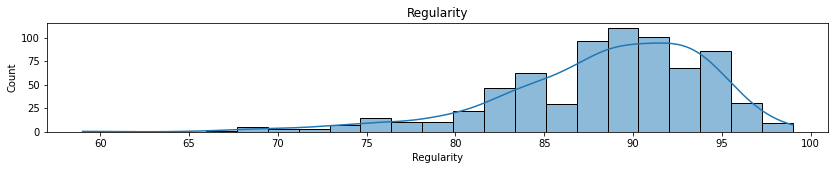

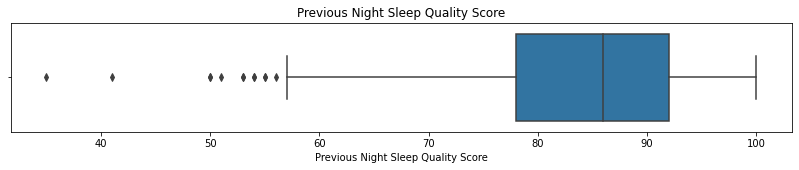

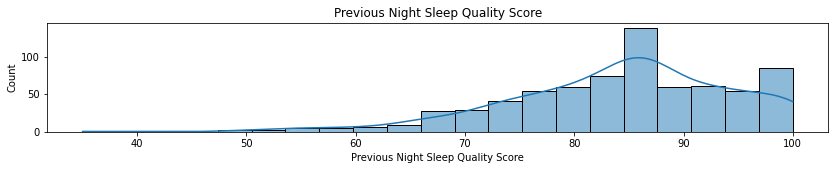

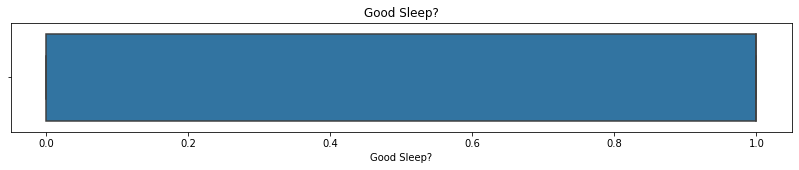

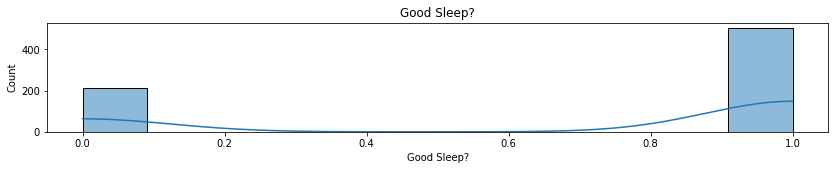

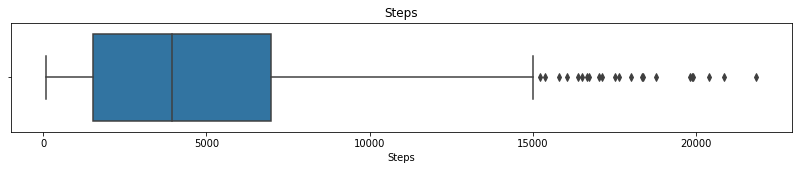

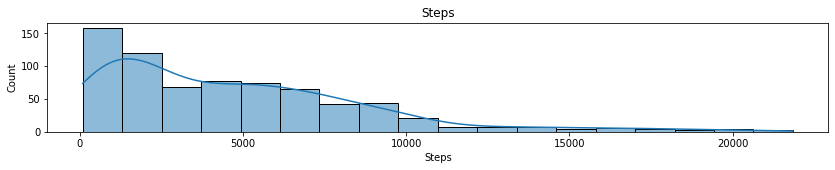

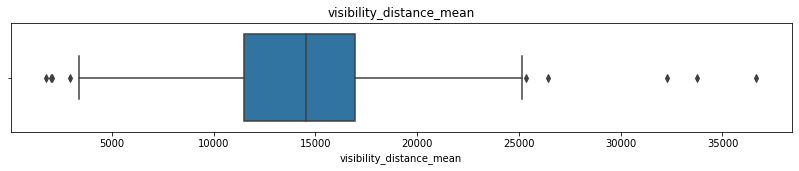

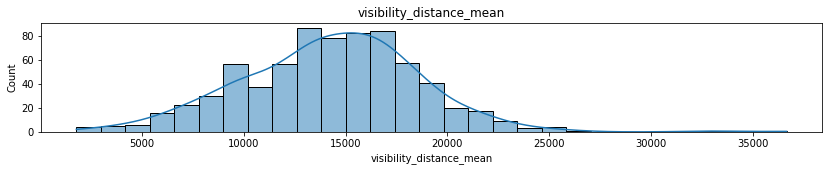

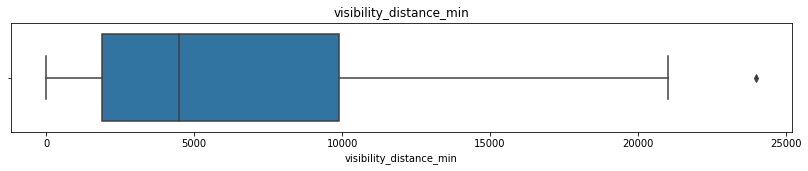

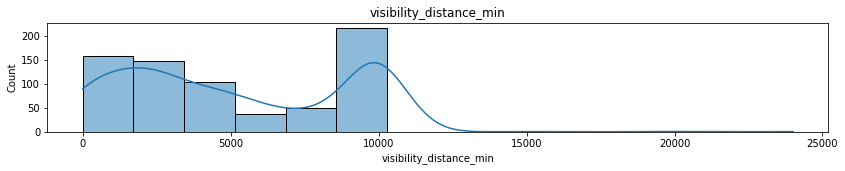

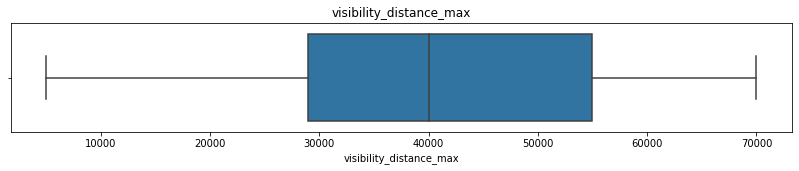

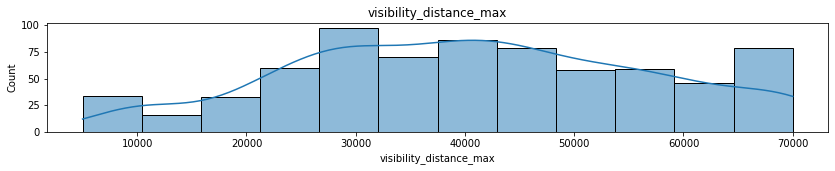

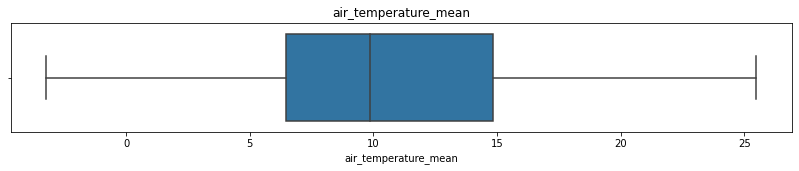

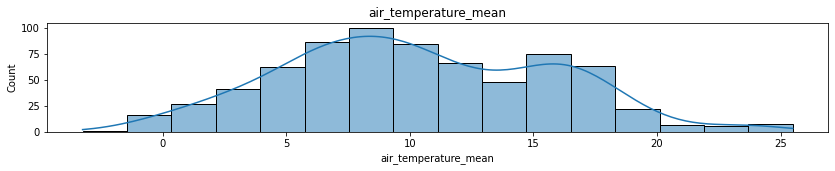

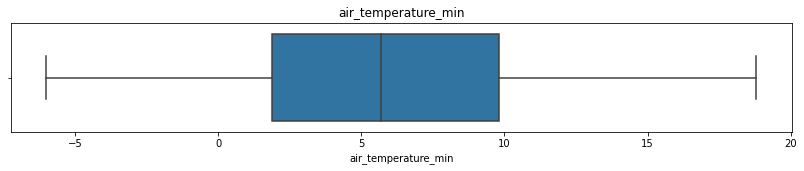

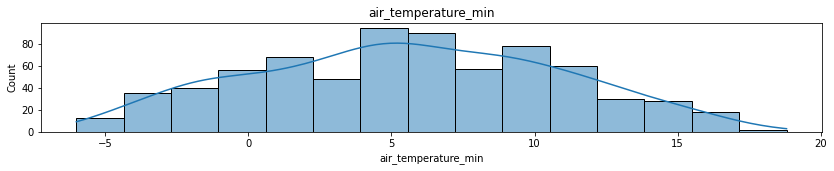

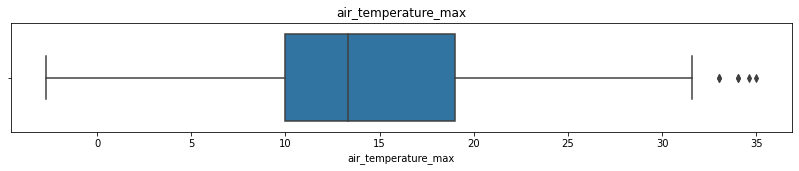

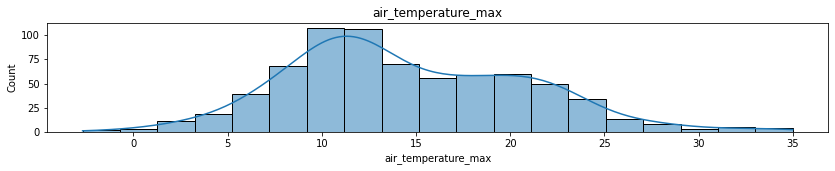

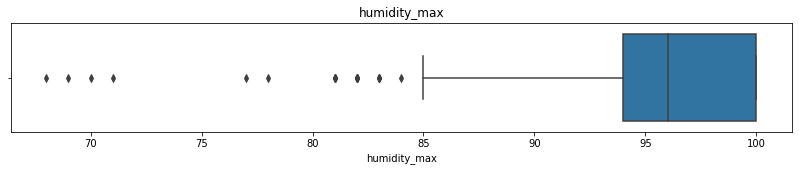

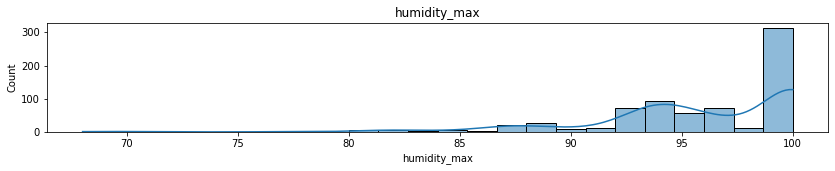

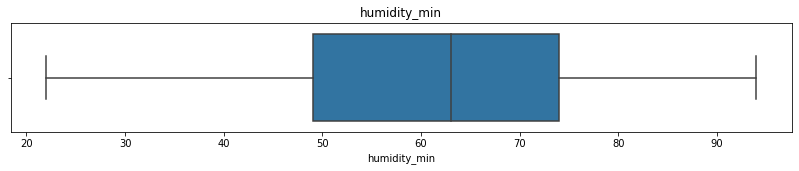

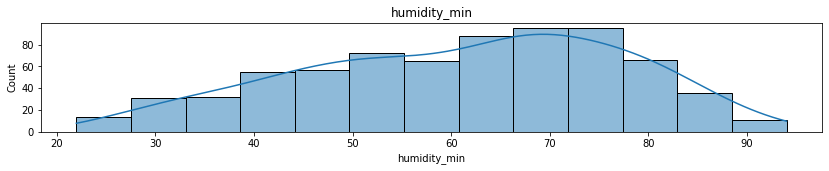

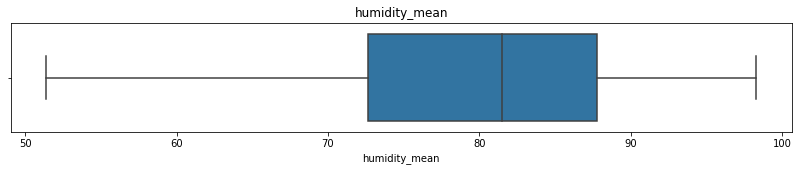

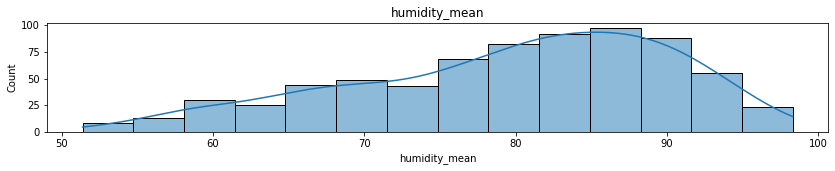

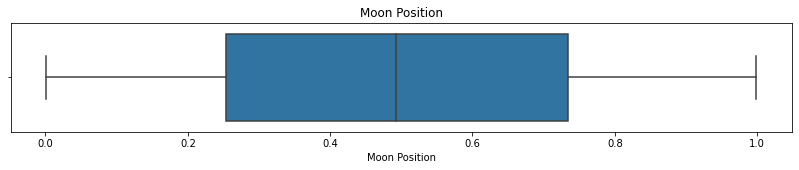

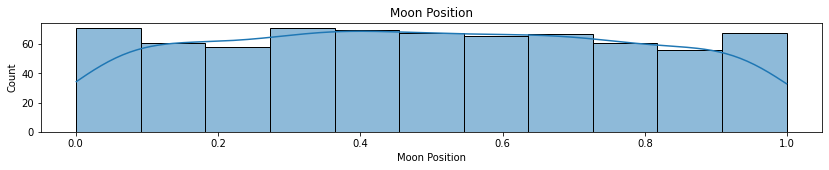

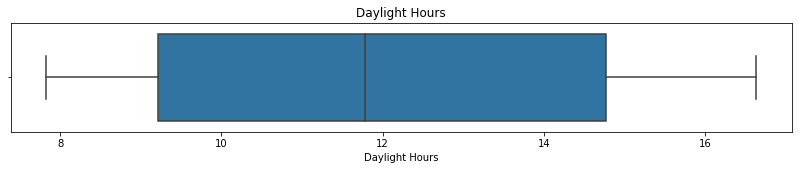

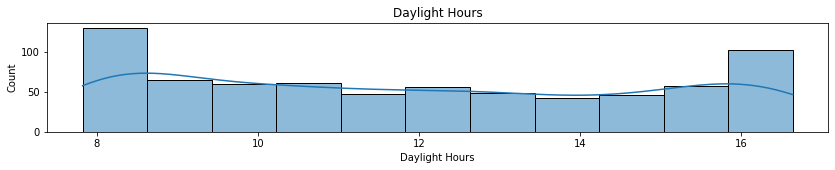

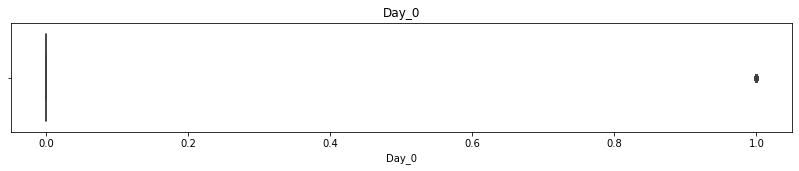

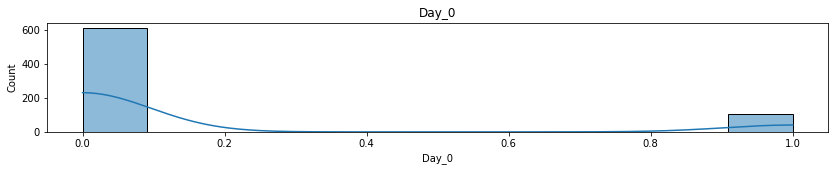

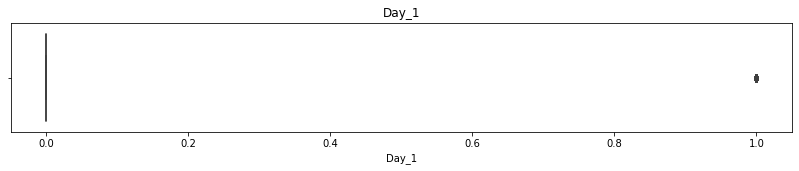

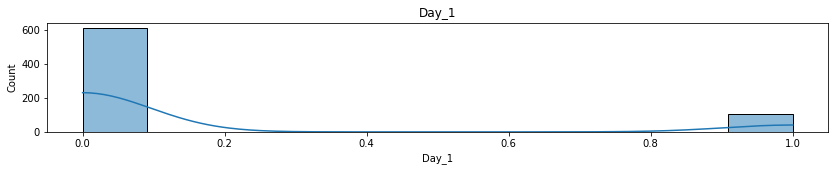

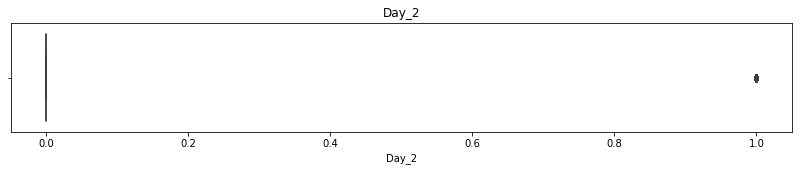

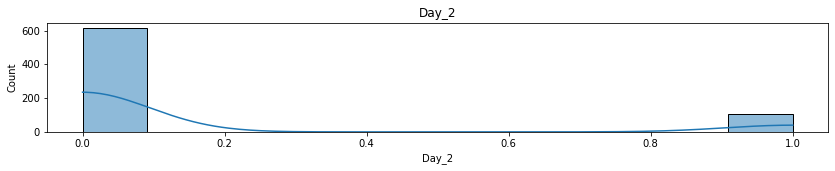

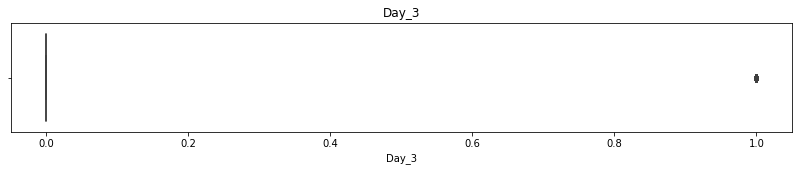

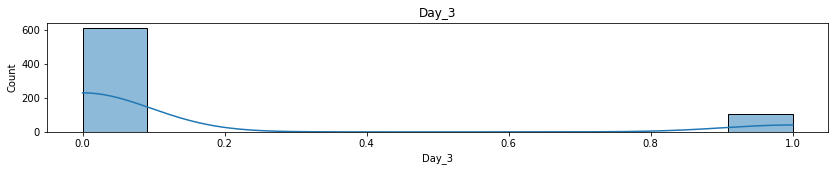

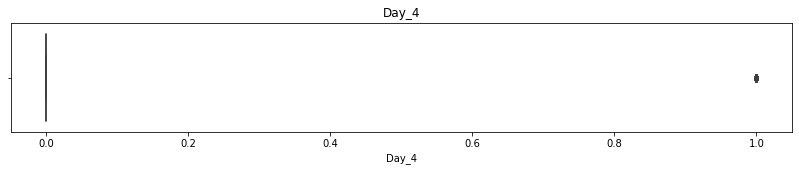

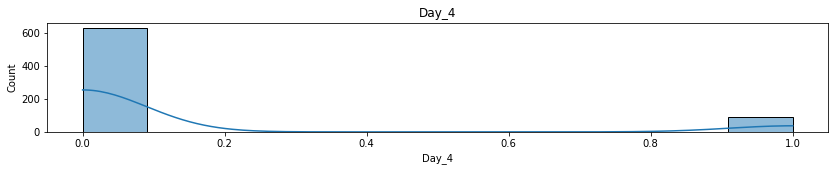

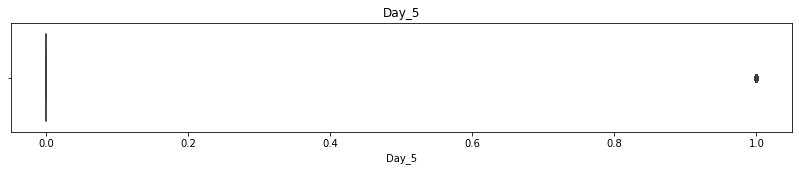

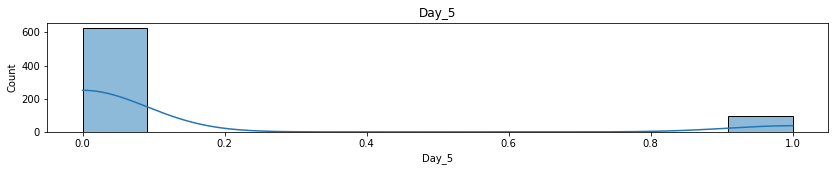

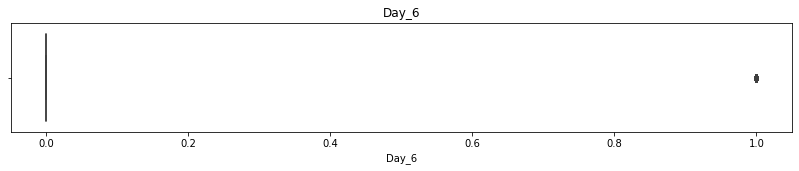

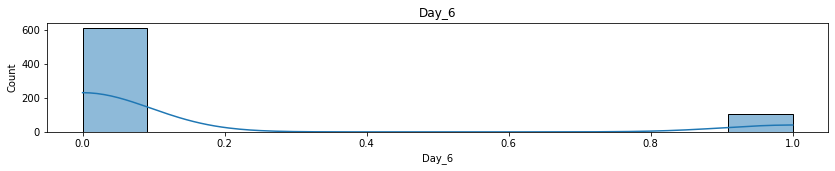

In [3]:
%matplotlib inline
df_num = df.select_dtypes(include=[np.number])

for i in df_num.columns:
    col = df_num[i].dropna()
    fig, ax = plt.subplots(figsize=(14, 2))
    sns.boxplot(x=col)
    ax.set_title(i)

    plt.show()

    fig2, ax2 = plt.subplots(figsize=(14, 2))
    sns.histplot(data=col,kde=True)

    ax2.set_title(i)

# Correlations

In [4]:
df.corr()

,Regularity,Previous Night Sleep Quality Score,Good Sleep?,Steps,visibility_distance_mean,visibility_distance_min,visibility_distance_max,air_temperature_mean,air_temperature_min,air_temperature_max,...,humidity_mean,Moon Position,Daylight Hours,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
Regularity,1.000000,0.131132,0.080444,-0.021674,0.074865,0.003421,0.045896,0.021554,-0.049101,0.068824,...,-0.077558,0.007235,0.135420,-0.046228,-0.023851,0.097475,0.075262,0.030799,-0.011789,-0.119464
Previous Night Sleep Quality Score,0.131132,1.000000,0.250482,0.097414,-0.160238,-0.069456,-0.190877,-0.207972,-0.146161,-0.219604,...,0.207028,-0.019647,-0.209474,-0.063286,0.024865,-0.051012,-0.024254,0.020793,0.055099,0.041804
Good Sleep?,0.080444,0.250482,1.000000,0.041206,-0.125466,-0.075708,-0.126819,-0.298700,-0.244754,-0.305746,...,0.199082,-0.049842,-0.269276,0.008005,-0.043319,0.009005,0.053125,-0.007688,0.043158,-0.060427
Steps,-0.021674,0.097414,0.041206,1.000000,0.055929,0.045643,-0.017034,-0.004478,-0.000021,0.001680,...,0.018336,0.030671,0.028653,-0.032609,-0.055305,-0.061224,0.028260,0.068475,0.089561,-0.028367
visibility_distance_mean,0.074865,-0.160238,-0.125466,0.055929,1.000000,0.615138,0.735498,0.260035,0.153297,0.284289,...,-0.586119,0.008239,0.381444,0.011321,0.019125,-0.042175,0.004498,0.009842,0.037206,-0.037557
visibility_distance_min,0.003421,-0.069456,-0.075708,0.045643,0.615138,1.000000,0.200549,0.229659,0.160021,0.246391,...,-0.608104,-0.007081,0.325184,-0.000280,0.010931,0.010105,0.001072,-0.035044,0.041676,-0.028272
visibility_distance_max,0.045896,-0.190877,-0.126819,-0.017034,0.735498,0.200549,1.000000,0.146228,0.080036,0.152090,...,-0.276372,0.006693,0.219574,-0.013007,0.006824,-0.030286,0.021815,0.038818,0.006312,-0.028001
air_temperature_mean,0.021554,-0.207972,-0.298700,-0.004478,0.260035,0.229659,0.146228,1.000000,0.899173,0.949828,...,-0.359367,-0.071843,0.674934,-0.025503,0.002332,0.018494,0.006553,0.008258,0.001625,-0.010931
air_temperature_min,-0.049101,-0.146161,-0.244754,-0.000021,0.153297,0.160021,0.080036,0.899173,1.000000,0.746888,...,-0.115297,-0.064259,0.498850,-0.036853,-0.021352,0.000438,0.014110,0.012790,0.029341,0.003992
air_temperature_max,0.068824,-0.219604,-0.305746,0.001680,0.284289,0.246391,0.152090,0.949828,0.746888,1.000000,...,-0.486341,-0.055262,0.726970,-0.016520,0.019935,0.031268,-0.007355,0.005285,-0.011942,-0.020611


<AxesSubplot:>

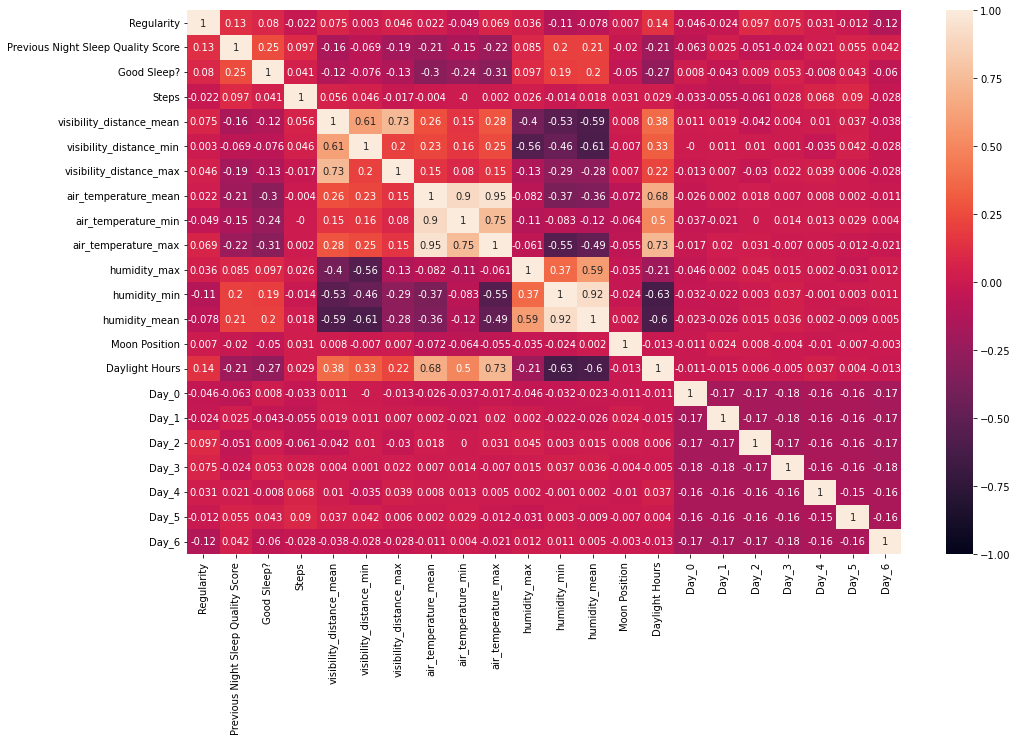

In [23]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr().round(3), vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

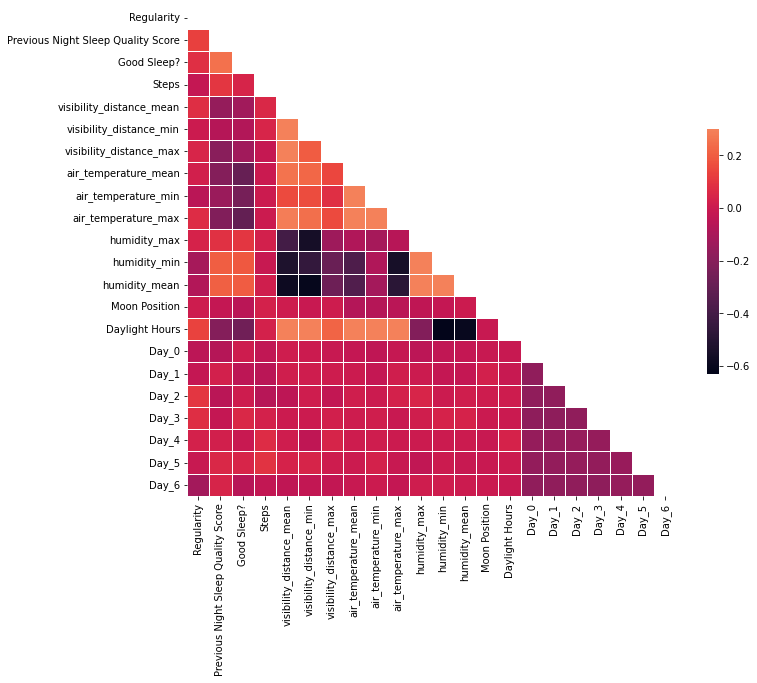

In [16]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='rocket', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Pandas Profiling

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", vars={"num": {"low_categorical_threshold": 0}})
profile

# Normalising - min_max_scaler

In [26]:
# Scale only columns that have values greater than 1
# to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()

df_to_scale = df[df.columns[~df.columns.isin(['Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 
                                              'Day_6', 
                                              'Good Sleep?', 
                                              'Previous Night Sleep Quality Score', 
                                              'Start Date'])]]

#df_to_scale = df[df.columns[~df.columns.isin(['Good Sleep?', 'Date_y'])]]

#display(df_to_scale)
scaled = mms.fit_transform(df_to_scale)
scaled = pd.DataFrame(scaled, columns=df_to_scale.columns)

# Replace original columns with scaled ones
for col in scaled:
    df[col] = scaled[col]
    
display(df)
df.to_excel('../data/max_min_scaled.xlsx')

,Start Date,Regularity,Previous Night Sleep Quality Score,Good Sleep?,Steps,visibility_distance_mean,visibility_distance_min,visibility_distance_max,air_temperature_mean,air_temperature_min,...,humidity_mean,Moon Position,Daylight Hours,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,2019-12-24,0.350,86.204221,1,0.048945,0.334010,0.129167,0.846141,0.425947,0.524194,...,0.742045,0.910822,0.000694,0,1,0,0,0,0,0
1,2019-12-25,0.575,86.000000,1,0.054093,0.471352,0.012500,0.923063,0.230211,0.161290,...,0.740565,0.944890,0.001324,0,0,1,0,0,0,0
2,2019-12-26,0.675,88.000000,1,0.006940,0.271254,0.104167,0.692297,0.341715,0.161290,...,0.857481,0.978958,0.002112,0,0,0,1,0,0,0
3,2019-12-27,0.775,90.000000,1,0.239901,0.233608,0.187500,0.323072,0.334897,0.479839,...,0.875240,0.011022,0.003152,0,0,0,0,1,0,0
4,2019-12-28,0.700,92.000000,0,0.114435,0.208455,0.112500,0.276919,0.379140,0.512097,...,0.839130,0.045090,0.004382,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2022-03-26,0.775,86.204221,1,0.523324,0.269027,0.112500,0.461531,0.424399,0.201613,...,0.300725,0.780561,0.539926,0,0,0,0,0,1,0
713,2022-04-01,0.800,86.204221,1,0.165908,0.502512,0.416625,0.769219,0.224119,0.120968,...,0.389818,0.983968,0.584818,0,0,0,0,1,0,0
714,2022-04-02,0.775,87.000000,1,0.264075,0.419833,0.191667,0.769219,0.170574,0.060484,...,0.539903,0.016032,0.592289,0,0,0,0,0,1,0
715,2022-04-03,0.700,89.000000,0,0.387150,0.361392,0.033333,0.692297,0.217784,0.040323,...,0.381530,0.049098,0.599729,0,0,0,0,0,0,1
